**AIM:**To find the prices of home from the train.csv file and testing the Appropriate Algo which we find suitable from train data on given test.csv file

**Competition Description**
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

General Process of loading required library

In [ ]:
#Load Library 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Load Given Data both test and train 

In [ ]:
#Load Data
import pandas as pd
sample_submission = pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")
test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")
train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")

In [ ]:
train.columns,test.columns


In [ ]:
train.shape,test.shape

After loading data and finding Shape of test data and train data.
Lets now focuson cleaning of data

In [ ]:
train['SalePrice'].describe()

In [ ]:
sns.distplot(train['SalePrice'])

Normal Distribution Curve for Sales price and  its observations
**OBSERVATION:**
* MORE DEVITATED TOWARDS LEFT AND SIDE
* HAVE POSITIVE SKEWNWSS

A normal distribution, sometimes called the bell curve, is a distribution that occurs naturally in many situations.
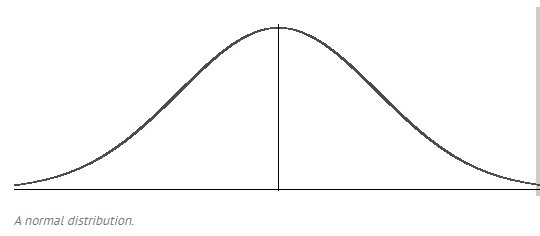
The bell curve is symmetrical. Half of the data will fall to the left of the mean; half will fall to the right.
Many groups follow this type of pattern. That’s why it’s widely used in business, statistics and in government bodies 


The empirical rule tells you what percentage of your data falls within a certain number of standard deviations from the mean:
• 68% of the data falls within one standard deviation of the mean.
• 95% of the data falls within two standard deviations of the mean.
• 99.7% of the data falls within three standard deviations of the mean.
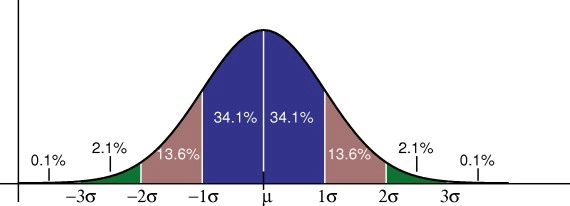
Properties of a normal distribution
The mean, mode and median are all equal.
The curve is symmetric at the center (i.e. around the mean, μ).
Exactly half of the values are to the left of center and exactly half the values are to the right.
The total area under the curve is 1.
The Standard Normal Model
A standard normal model is a normal distribution with a mean of 0 and a standard deviation of 1.


KEY TAKEAWAYS
Normal distribution is the proper term for a probability bell curve.
Normal distribution is symmetrical distribution, but not all symmetrical distributions are normal.
In reality, most pricing distributions are not perfectly normal.

What do if my data distribution is not Normal?
I analyzed the skewness and kurtosis of SalePrice variables in data against the independent variable 
to get the z-values.



In [ ]:
#finding Skness and Kurtosis
print('Skewness:%f' %train['SalePrice'].skew())
print('Kurtosis:%f'% train['SalePrice'].kurt())

**Skewness and Kurtosis**
Real life data rarely, if ever, follow a perfect normal distribution. The skewness and kurtosis coefficients measure how different a given distribution is from a normal distribution. The skewness measures the symmetry of a distribution. The normal distribution is symmetric and has a skewness of zero. If the distribution of a data set has a skewness less than zero, or negative skewness, then the left tail of the distribution is longer than the right tail; positive skewness implies that the right tail of the distribution is longer than the left.

The kurtosis statistic measures the thickness of the tail ends of a distribution in relation to the tails of the normal distribution. Distributions with large kurtosis exhibit tail data exceeding the tails of the normal distribution (e.g., five or more standard deviations from the mean). Distributions with low kurtosis exhibit tail data that is generally less extreme than the tails of the normal distribution. The normal distribution has a kurtosis of three, which indicates the distribution has neither fat nor thin tails. Therefore, if an observed distribution has a kurtosis greater than three, the distribution is said to have heavy tails when compared to the normal distribution. If the distribution has a kurtosis of less than three, it is said to have thin tails when compared to the normal distribution.

**Plots the Graphs:**
  Plot the "X"-axis variables (Independent Variables) against "Y"-axis variables(Dependent Variable-SalePrice).
  
  Graphs are a common method to visually illustrate relationships in the data. The purpose of a graph is to present data that are too numerous or complicated to be described adequately in the text and in less space. Do not, however, use graphs for small amounts of data that could be conveyed succinctly in a sentence. Likewise, do not reiterate the data in the text since it defeats the purpose of using a graph. If the data shows pronounced trends or reveals relations between variables, a graph should be used. If the data doesn't show any significant trend in the evidence, a graph is not the figure of choice
  
  If the independent and dependent variables are numeric, use line diagrams or scattergrams; if only the dependent variable is numeric, use bar graphs; for proportions, use bar graphs or pie charts. 
  
  A scattergram is used to show the relationship between two variables and whether their values change in a consistent way, such as analyzing the relationship between the concentration levels of two different proteins.

A line graph is similar to the scattergram except that the X values represent a continuous variable, such as time, temperature, or pressure. It plots a series of related values that depict a change in Y as a function of X. Line graphs usually are designed with the dependent variable on the Y-axis and the independent variable on the horizontal X-axis, such as a Kaplan-Meier analyses survival plots of time-to-event outcomes. The proportion of individuals is represented on the Y-axis as a proportion or percentage, remaining free of or experiencing a specific outcome over time.

A bar graph may consist of either horizontal or vertical columns. The greater the length of the bars, the greater the value. They are used to compare a single variable value between several groups, such as the mean protein concentration levels of a cohort of patients and a control group.

The histogram, also called a frequency distributions graph, is a specialized type of bar graph that resembles a column graph, but without any gaps between the columns. It is used to represent data from the measurement of a continuous variable. Individual data points are grouped together in classes to show the frequency of data in each class. The frequency is measured by the area of the column. These can be used to show how a measured category is distributed along a measured variable. These graphs are typically used, for example, to check if a variable follows a normal distribution, such as the distribution of protein levels between different individuals of a population.

A pie chart shows classes or groups of data in proportion to the whole data set. The entire pie represents all the data, while each slice or segment represents a different class or group within the whole. Each slice should show significant variations. The number of categories should be generally limited to between 3 and 10.

A box plot may be either horizontal or vertical. It is used to display a statistical summary of one or more box-and- variables, such as the minimum, lower quartile, median, and maximum. It may also identify the outlier data. The spacing between the different parts of the box indicates the degree of dispersion and whether the data distribution is symmetrical or skewed.

Some common errors include the following: information in the text is duplicated in graphs, or information in graphs is duplicated in tables. The graph does not have proper legends. The wrong type of graph is chosen to represent the data. The graph is not plotted to scale. Data is not labeled, is inconsistent, interrupted, or exaggerated to produce the desired effect. Another common error is to include a line that suggests an unsubstantiated extrapolation between or beyond the data points. Connecting discrete data points with a continuous line.A better way to display separate values would be a bar chart, in which each column reflects the average value obtained If an extremely large range must be covered and cannot be practically shown with a continuous scale, indicate a discontinuity in the scale and the data field with paired diagonal lines (—//—)or NA values indicating a missing extent of the range.

In [ ]:
data=pd.concat([train['SalePrice'],train['GrLivArea']],axis=1)
data.plot.scatter(x='GrLivArea',y='SalePrice')

**We use Scatter ploat as X(not a Continuous Data) and Y both are numeric values**

In [ ]:
data=pd.concat([train['SalePrice'],train['TotalBsmtSF']],axis=1)
data.plot.scatter(x='TotalBsmtSF',y='SalePrice')

In [ ]:
data=pd.concat([train['SalePrice'],train['OverallQual']],axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual',y='SalePrice',data=data)
fig.axis(ymin=0,ymax=800000)

In [ ]:
data = pd.concat([train['SalePrice'], train['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='YearBuilt', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

**Visualization is generally easier to understand than reading tabular data, heatmaps are typically used to visualize correlation matrices.**

In [ ]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Rescaling the matrix and reducing the value after point .

In [ ]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Finding Relation of reduced facters from heatmap

In [ ]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

**Finding null values in Columns**

In [ ]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

**Transformation:**
A large portion of the field of statistics is concerned with methods that assume a Gaussian distribution: the familiar bell curve.

If your data has a Gaussian distribution, the parametric methods are powerful and well understood. This gives some incentive to use them if possible. Even if your data does not have a Gaussian distribution.

It is possible that your data does not look Gaussian or fails a normality test, but can be transformed to make it fit a Gaussian distribution

There are sevral reasons for data notnormally distributed:
**1)Sample Size**
One common reason that a data sample is non-Gaussian is because the size of the data sample is too small.
**2)Data Resolution**
Perhaps you expect a Gaussian distribution from the data, but no matter the size of the sample that you collect, it does not materialize.

A common reason for this is the resolution that you are using to collect the observations. The distribution of the data may be obscured by the chosen resolution of the data or the fidelity of the observations. There may be many reasons why the resolution of the data is being modified prior to modeling, such as:

The configuration of the mechanism making the observation.
The data is passing through a quality-control process.
The resolution of the database used to store the data.

**3)Extreme Values**
A data sample may have a Gaussian distribution, but may be distorted for a number of reasons.

A common reason is the presence of extreme values at the edge of the distribution. Extreme values could be present for a number of reasons, such as:

Measurement error.
Missing data.
Data corruption.
Rare events.
In such cases, the extreme values could be identified and removed in order to make the distribution more Gaussian. These extreme values are often called outliers.

This may require domain expertise or consultation with a domain expert in order to both design the criteria for identifying outliers and then removing them from the data sample and all data samples that you or your model expect to work with in the future.

**4)Long Tails:**
Extreme values can manifest in many ways. In addition to an abundance of rare events at the edge of the distribution, you may see a long tail on the distribution in one or both directions.

In plots, this can make the distribution look like it is exponential, when in fact it might be Gaussian with an abundance of rare events in one direction.

You could use simple threshold values, perhaps based on the number of standard deviations from the mean, to identify and remove long tail values.

**5)Power Transforms:**
The distribution of the data may be normal, but the data may require a transform in order to help expose it.

For example, the data may have a skew, meaning that the bell in the bell shape may be pushed one way or another. In some cases, this can be corrected by transforming the data via calculating the square root of the observations.

Alternately, the distribution may be exponential, but may look normal if the observations are transformed by taking the natural logarithm of the values. Data with this distribution is called log-normal.

In [ ]:
sns.distplot(train['SalePrice']);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

In [ ]:
#applying log transformation
train['SalePrice'] = np.log(train['SalePrice'])

In [ ]:
#transformed histogram and normal probability plot
sns.distplot(train['SalePrice']);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

In [ ]:
#histogram and normal probability plot
sns.distplot(train['GrLivArea']);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

In [ ]:
#data transformation
train['GrLivArea'] = np.log(train['GrLivArea'])

In [ ]:
#transformed histogram and normal probability plot
sns.distplot(train['GrLivArea']);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

In [ ]:
#histogram and normal probability plot
sns.distplot(train['TotalBsmtSF']);
fig = plt.figure()
res = stats.probplot(train['TotalBsmtSF'], plot=plt)

**Model Building**
Finally we have arrived at most interesting stage of the whole process — predictive modeling. We will start off with the simpler models and gradually move on to more sophisticated models. We will start with the simpler linear models and then move over to more complex models like RandomForest and XGBoost.

We will build the following models in the next sections.

Linear Regression
Lasso Regression
Ridge Regression
RandomForest
XGBoost

One hot encoding for the categorical variable

In [ ]:
train.info()

In [ ]:
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)
#this you can see at the time of heatmap also.

In [ ]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = train.select_dtypes(include=['object']).columns
categorical_features


In [ ]:
numerical_features = train.select_dtypes(exclude = ["object"]).columns

In [ ]:
#categorical features
categorical_features = train.select_dtypes(include = ["object"]).columns
numerical_features = train.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("SalePrice")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
train_num = train[numerical_features]
train_cat = train[categorical_features]

In [ ]:
#categorical features
categorical_features = train.select_dtypes(include = ["object"]).columns
numerical_features = train.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("SalePrice")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
train_num = train[numerical_features]
train_cat = train[categorical_features]

simply used median() to fill na values, actually there is lot to explore when you do feature engineering. But this notebook aim is to simplify things(no heavy code)

In [ ]:
# Handle remaining missing values for numerical features by using median as replacement
print("NAs for numerical features in train : " + str(train_num.isnull().values.sum()))
train_num = train_num.fillna(train_num.median())
print("Remaining NAs for numerical features in train : " + str(train_num.isnull().values.sum()))

In [ ]:
from scipy.stats import skew 
skewness = train_num.apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

In [ ]:
skewness = skewness[abs(skewness)>0.5]
skewness.index

In [ ]:
skew_features = train[skewness.index]
skew_features.columns

In [ ]:
#we can treat skewness of a feature with the help fof log transformation.so we'll apply the same here.
skew_features = np.log1p(skew_features)

In [ ]:
# Create dummy features for categorical values via one-hot encoding
train_cat.shape 

In [ ]:
train_cat = pd.get_dummies(train_cat)
train_cat.shape

In [ ]:
train_cat.head()

In [ ]:
str(train_cat.isnull().values.sum())

In [ ]:
train = pd.concat([train_cat,train_num],axis=1)
train.shape

In [ ]:
from sklearn.linear_model import LinearRegression

**Train - Validation Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#split the data to train the model 
X_train,X_test,y_train,y_test = train_test_split(train,y,
test_size = 0.3,random_state= 0)

In [ ]:
print(X_train.shape,X_valid.shape,y_train.shape,y_valid.shape)

In [ ]:
X_train.head(3)

**Defining cross_val_score function for both train and test sets separately**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
n_folds = 5
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
scorer = make_scorer(mean_squared_error,greater_is_better = False)
def rmse_CV_train(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model,X_train,y_train,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)
def rmse_CV_test(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model,X_test,y_test,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)
test_pre = lr.predict(X_test)
train_pre = lr.predict(X_train)
print('rmse on train',rmse_CV_train(lr).mean())
print('rmse on train',rmse_CV_test(lr).mean())

In [ ]:
#plot between predicted values and residuals
plt.scatter(train_pre, train_pre - y_train, c = "blue",  label = "Training data")
plt.scatter(test_pre,test_pre - y_test, c = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

In [ ]:
# Plot predictions - Real values
plt.scatter(train_pre, y_train, c = "blue",  label = "Training data")
plt.scatter(test_pre, y_test, c = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

In [ ]:
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train,y_train)
alpha = ridge.alpha_
print('best alpha',alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4],cv = 5)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)
print("Ridge RMSE on Training set :", rmse_CV_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_CV_test(ridge).mean())
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)


In [ ]:
X_train.shape

In [ ]:
coef = pd.Series(ridge.coef_, index = X_train.columns)

print("Ridge picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

In [ ]:
# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue",  label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "black", marker = "v", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

In [ ]:
# Plot predictions - Real values
plt.scatter(y_train_rdg, y_train, c = "blue",  label = "Training data")
plt.scatter(y_test_rdg, y_test, c = "black",  label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()